# Time series decomposition/forecast in Python

# Import libraries

In [40]:
import os
from dotenv import load_dotenv

import requests
import json

import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Load FRED API key

In [41]:
load_dotenv()
API_KEY = os.getenv('API_KEY')

# Get time series data

In [45]:
INFO_GET_FORMAT = "https://api.stlouisfed.org/fred/series"
TIMESERIES_GET_FORMAT = "https://api.stlouisfed.org/fred/series/observations"
SERIES_ID = "NATURALGAS"
GET_QUERY = {'series_id':SERIES_ID, 'api_key':API_KEY, 'file_type':'json'}

In [46]:
info_result = requests.get(INFO_GET_FORMAT, params=GET_QUERY)
info_json = json.loads(info_result.text)['seriess'][0]
info_json

{'id': 'NATURALGAS',
 'realtime_start': '2018-09-11',
 'realtime_end': '2018-09-11',
 'title': 'Natural Gas Consumption',
 'observation_start': '2000-01-01',
 'observation_end': '2018-06-01',
 'frequency': 'Monthly',
 'frequency_short': 'M',
 'units': 'Billion Cubic Feet',
 'units_short': 'Bil. Cubic Feet',
 'seasonal_adjustment': 'Not Seasonally Adjusted',
 'seasonal_adjustment_short': 'NSA',
 'last_updated': '2018-08-20 09:51:02-05',
 'popularity': 24,
 'notes': 'This data is collected by the U.S. Energy Information Administration (EIA) available at: http://www.eia.gov/dnav/ng/hist/n9140us2m.htm and  http://www.eia.doe.gov/emeu/steo/pub/contents.html (forecast).'}

In [47]:
timeseries_result = requests.get(TIMESERIES_GET_FORMAT, params=GET_QUERY)
timeseries_json = json.loads(timeseries_result.text)
data_df = pd.DataFrame(timeseries_json['observations'])
data_df = data_df[['date', 'value']]
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['value'] = pd.to_numeric(data_df['value'])

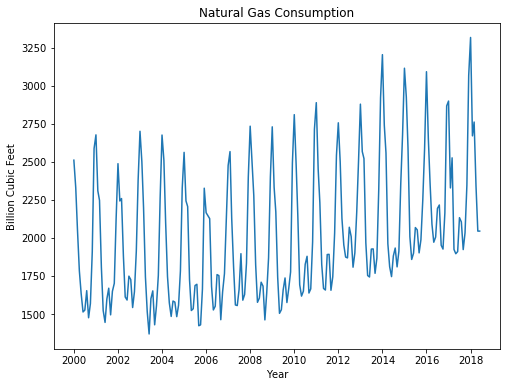

In [52]:
plt.figure(figsize=(8, 6))
plt.plot('date', 'value', data=data_df)
plt.title(info_json['title'])
plt.xlabel('Year');
plt.ylabel(info_json['units']);

# statsmodels.tsa.seasonal.seasonal_decompose
Reference:  

statsmodels.tsa.seasonal.seasonal_decompose  
https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html  
How to Decompose Time Series Data into Trend and Seasonality  
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [62]:
seas_dec_result = seasonal_decompose(data_df['value'], model='additive', freq=12)

In [63]:
seas_dec_result.trend

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6      1885.154167
7      1891.208333
8      1898.491667
9      1907.654167
10     1904.045833
11     1896.579167
12     1896.737500
13     1900.429167
14     1901.895833
15     1906.079167
16     1900.820833
17     1872.704167
18     1845.341667
19     1834.654167
20     1832.350000
21     1835.916667
22     1842.704167
23     1852.541667
24     1864.929167
25     1873.545833
26     1877.904167
27     1879.775000
28     1888.500000
29     1908.137500
          ...     
192    2256.333333
193    2268.375000
194    2277.266667
195    2276.808333
196    2270.737500
197    2278.837500
198    2282.429167
199    2260.920833
200    2254.479167
201    2254.625000
202    2244.587500
203    2237.450000
204    2230.941667
205    2223.787500
206    2217.975000
207    2221.216667
208    2233.233333
209    2249.170833
210    2274.929167
211    2306.604167
212    2330.675000
213    2357.

In [64]:
seas_dec_result.seasonal

0      751.522648
1      463.621177
2      271.268726
3     -165.650391
4     -345.645490
5     -360.690097
6     -204.744822
7     -177.548063
8     -383.785100
9     -296.348757
10     -45.064267
11     493.064437
12     751.522648
13     463.621177
14     271.268726
15    -165.650391
16    -345.645490
17    -360.690097
18    -204.744822
19    -177.548063
20    -383.785100
21    -296.348757
22     -45.064267
23     493.064437
24     751.522648
25     463.621177
26     271.268726
27    -165.650391
28    -345.645490
29    -360.690097
          ...    
192    751.522648
193    463.621177
194    271.268726
195   -165.650391
196   -345.645490
197   -360.690097
198   -204.744822
199   -177.548063
200   -383.785100
201   -296.348757
202    -45.064267
203    493.064437
204    751.522648
205    463.621177
206    271.268726
207   -165.650391
208   -345.645490
209   -360.690097
210   -204.744822
211   -177.548063
212   -383.785100
213   -296.348757
214    -45.064267
215    493.064437
216    751

In [65]:
seas_dec_result.resid

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6     -154.809344
7      -60.560270
8      -39.706567
9      -43.505409
10      49.518433
11     197.856396
12      28.739852
13     -54.550344
14      73.435440
15      66.771225
16     -32.775344
17     -67.614069
18     -42.496844
19      12.093896
20      45.535100
21     109.532091
22     -96.639900
23    -225.406104
24    -128.851814
25     -94.767010
26     109.227107
27     166.875391
28      68.645490
29      43.952597
          ...    
192     84.144019
193    -80.596177
194   -191.335393
195    -21.757942
196     46.307990
197     87.352597
198    115.615656
199    132.727230
200     80.605933
201    -31.976243
202    -35.123233
203    136.785563
204    -83.364314
205   -359.308677
206     36.656274
207   -131.366275
208      8.112156
209     21.419264
210     62.515656
211    -24.056104
212    -23.989900
213    -28.997076
214     10.260100
215    181.331396
216       

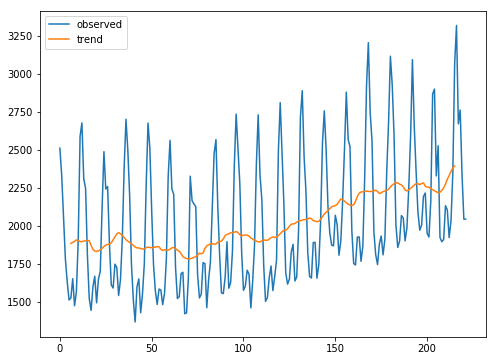

In [66]:
seas_dec_result.observed.plot(figsize=(8, 6), label='observed');
seas_dec_result.trend.plot(figsize=(8, 6), label='trend');
plt.legend();

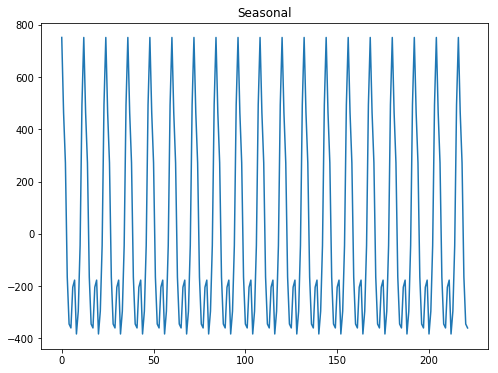

In [67]:
seas_dec_result.seasonal.plot(figsize=(8, 6), title='Seasonal');

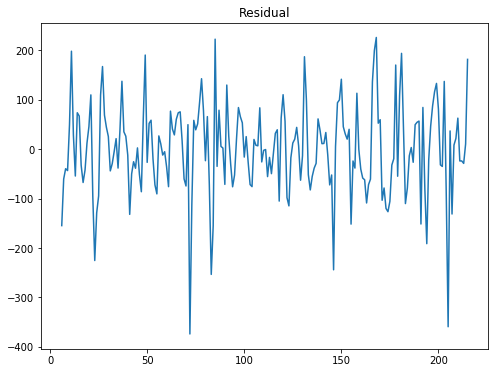

In [68]:
seas_dec_result.resid.plot(figsize=(8, 6), title='Residual');

# sm.tsa.statespace.SARIMAX
Reference:  

A Guide to Time Series Forecasting with ARIMA in Python 3  
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3  
Seasonal ARIMA with Python  
http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb  
SARIMAX: Introduction  
https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html  
SARIMAX on mean visits  
https://www.kaggle.com/aless80/sarimax-on-mean-visits  
Implementing and estimating an ARMA(1, 1) state space model  
http://www.chadfulton.com/topics/arma11_cpi_inflation.html  
An End-to-End Project on Time Series Analysis and Forecasting with Python  
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

## ACF, PACF

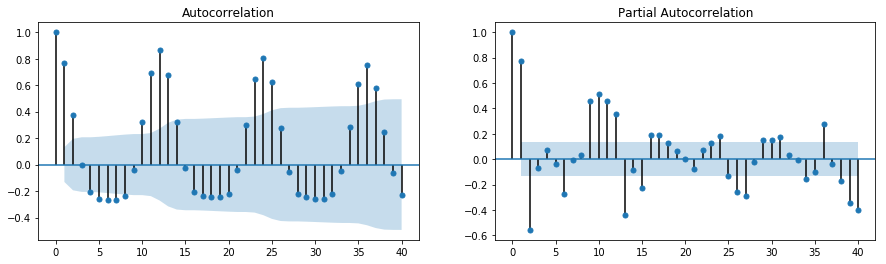

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(data_df['value'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data_df['value'], lags=40, ax=axes[1])